# Problem Set \#6 Solutions
## ECON 833, Computational Methods for Economists


In [1]:
import numpy as np
import pandas as pd
import os
import sklearn
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [2]:
# read in data
df = pd.read_csv(os.path.join(
    "..", "MachineLearning", "biden.csv"))
df.describe()

,biden,female,age,educ,dem,rep
count,1807.000000,1807.000000,1807.000000,1807.000000,1807.000000,1807.000000
mean,62.163807,0.552850,47.535141,13.360266,0.431655,0.205313
std,23.462034,0.497337,16.887444,2.440257,0.495444,0.404042
min,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000
25%,50.000000,0.000000,34.000000,12.000000,0.000000,0.000000
50%,60.000000,1.000000,47.000000,13.000000,0.000000,0.000000
75%,85.000000,1.000000,59.500000,16.000000,1.000000,0.000000
max,100.000000,1.000000,93.000000,17.000000,1.000000,1.000000


In [3]:
# separate data into X and y -- and make list of var names
X_var_names = ["female", "age", "educ", "dem", "rep"]
X = df[X_var_names]
y = df["biden"]

## 1. Estimate a decision tree on a training dataset

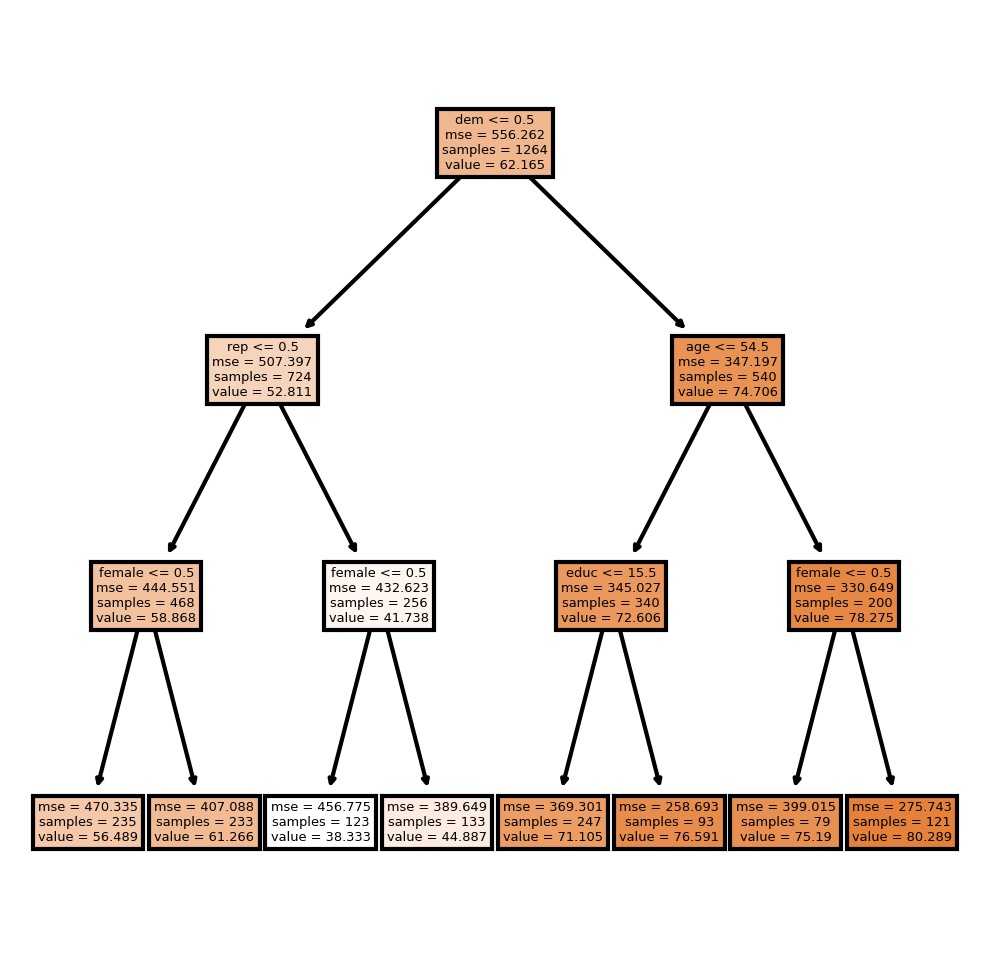

In [4]:
# partion sample into test and training data
X_train, X_test, y_train, y_test =\
    train_test_split(
        X, y,
        test_size=0.3,
        random_state=25)
# estimate regression tree
dtr = tree.DecisionTreeRegressor(max_depth=3, min_samples_leaf=5)
biden_tree = dtr.fit(X_train, y_train)
# plot tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(biden_tree,
           feature_names = X_var_names, 
           filled = True);

Results: It appears that Biden has more favorability among females that males.  Party affiliation explains a great deal of the difference -- democrats have much higher favorability ratings.   Among replublicans, gender explains more of the additional variation.  Among democratic leaning respondants, those with more education and of older age view Biden more favorably.

In [5]:
# MSE on the test and training data
MSE_train = mean_squared_error(y_train, biden_tree.predict(X_train))
MSE_test = mean_squared_error(y_test, biden_tree.predict(X_test))
print('The training MSE is = ', MSE_train)
print('The test MSE is = ', MSE_test)

The training MSE is =  390.46648050803356
The test MSE is =  396.1937146321307


## 2. Optimally tune hyperparameters and re-estimate

Here, we use `sklearn.model_selection.RandomizedSearchCV` to tune the following hyperparameters:
    
1. max_depth,
2. min_samples_split
3. min_samples_leaf

In [6]:
# Import function to randomly draw integers over a range
from scipy.stats import randint as sp_randint

param_dist = {
    "max_depth": [3, 10],  # just two options here
    "min_samples_split": sp_randint(2, 20),
    "min_samples_leaf": sp_randint(2, 20)}
        
dtr = tree.DecisionTreeRegressor()
clf = sklearn.model_selection.RandomizedSearchCV(
    dtr,  # The model to fit
    param_dist,
    scoring="neg_mean_squared_error",
    random_state=25,
    n_iter=100,  # number of parameter settings that are sampled
    cv=5,  # number of folds in cross-validation
    n_jobs=-1
)
# do the hyperparameter search with the our data
search = clf.fit(X, y)
# report the best params
print('The optimal tuning parameters are: ', search.best_params_)
# report the MSE of the optimal results
print('The MSE with these optimal parameters is ', -1 * search.best_score_)

The optimal tuning parameters are:  {'max_depth': 3, 'min_samples_leaf': 17, 'min_samples_split': 14}
The MSE with these optimal parameters is  401.713307249986


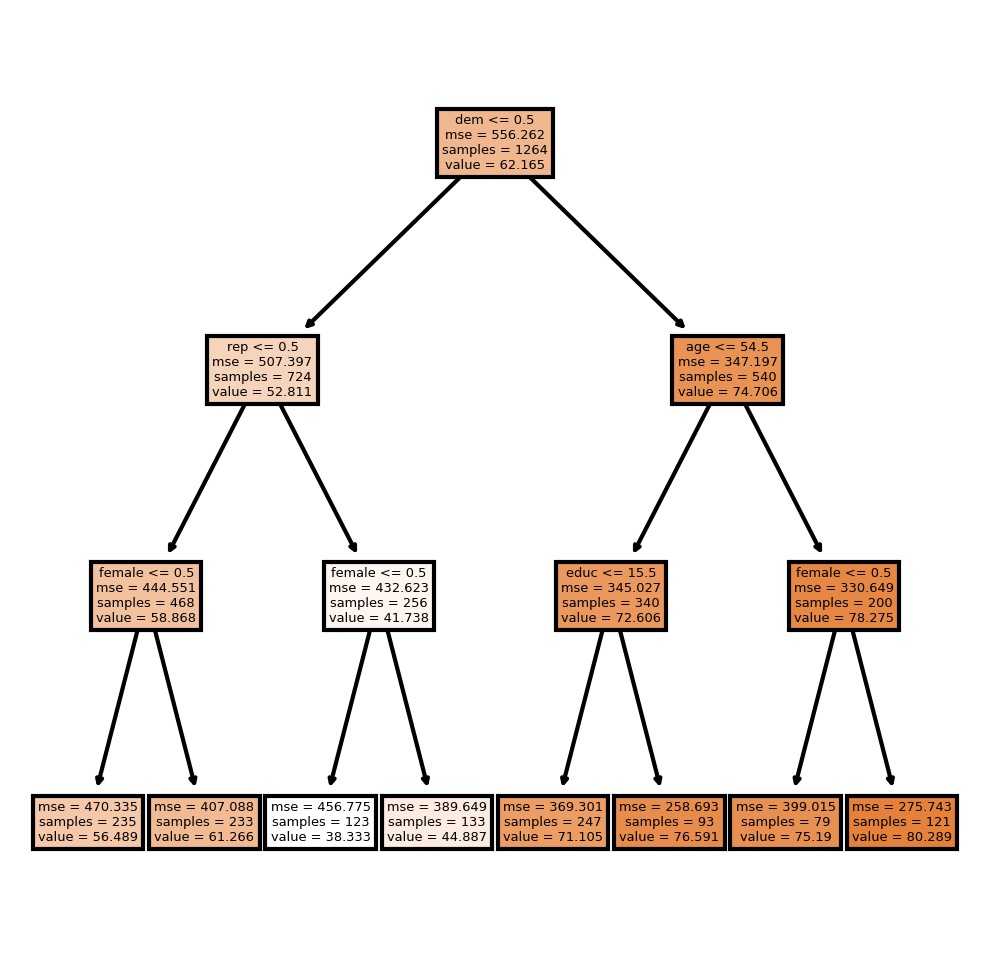

In [7]:
# Now we estimate the tree on the full data with these
# hyperparameters
# estimate regression tree
dtr = tree.DecisionTreeRegressor(**search.best_params_)
biden_tree = dtr.fit(X_train, y_train)
# plot tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(biden_tree,
           feature_names = X_var_names, 
           filled = True);

## 3. Find optimal hyperparameters with RandomForests


In [8]:
param_dist = {
    "n_estimators": [10, 200],
    "max_depth": [3, 10],
    "min_samples_split": sp_randint(2, 20),
    "min_samples_leaf": sp_randint(2, 20),
    "max_features": sp_randint(1, 5)}
        
rftr = RandomForestRegressor()
clf = sklearn.model_selection.RandomizedSearchCV(
    rftr,  # The model to fit
    param_dist,
    scoring="neg_mean_squared_error",
    random_state=25,
    n_iter=100,  # number of parameter settings that are sampled
    cv=5,  # number of folds in cross-validation
    n_jobs=-1
)
# do the hyperparameter search with the our data
search = clf.fit(X, y)
# report the best params
print('The optimal tuning parameters are: ', search.best_params_)
# report the MSE of the optimal results
print('The MSE with these optimal parameters is ', -1 * search.best_score_)

The optimal tuning parameters are:  {'max_depth': 3, 'max_features': 3, 'min_samples_leaf': 9, 'min_samples_split': 19, 'n_estimators': 10}
The MSE with these optimal parameters is  396.69569027527416


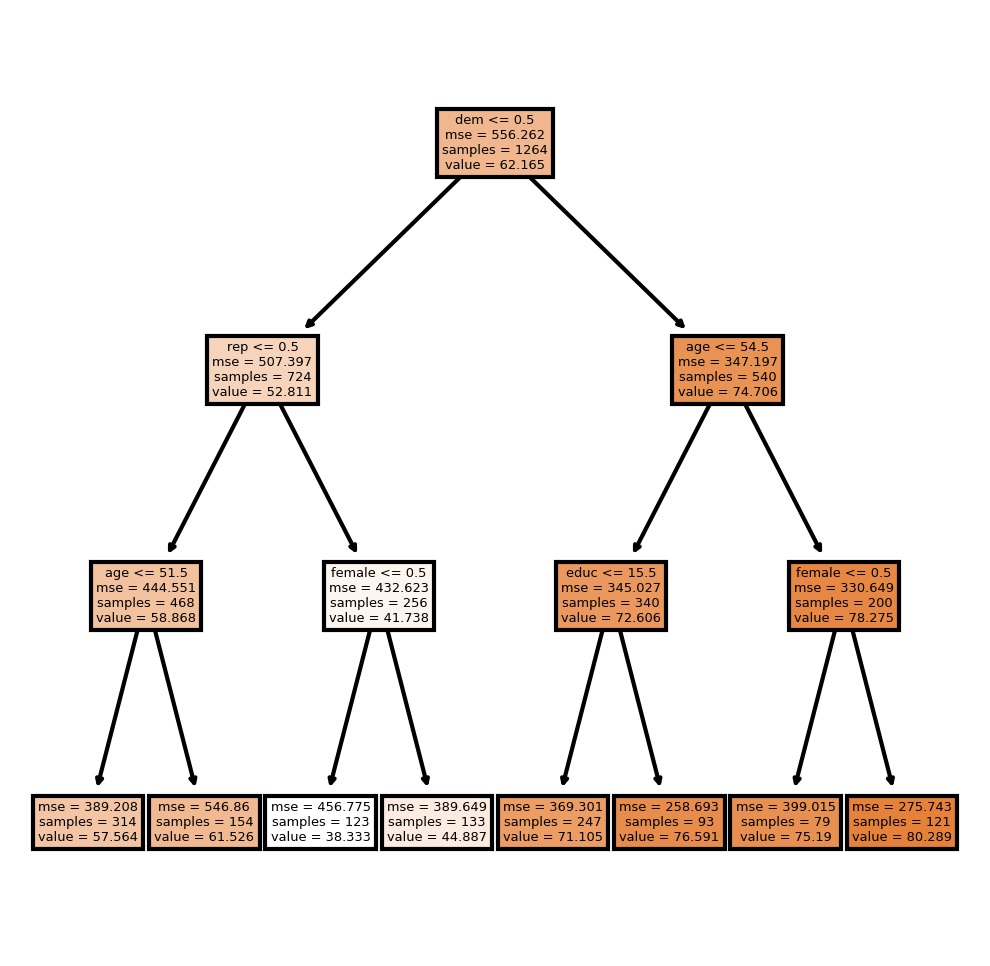

In [9]:
# Now we estimate the tree on the full data with these
# hyperparameters
# estimate regression tree
dtr = tree.DecisionTreeRegressor(
    max_depth=search.best_params_['max_depth'],
    max_features=search.best_params_['max_features'],
    min_samples_leaf=search.best_params_['min_samples_leaf'],
    min_samples_split=search.best_params_['min_samples_split']
)
biden_tree = dtr.fit(X_train, y_train)
# plot tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(biden_tree,
           feature_names = X_var_names, 
           filled = True);